In [3]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import os

dest_directory = 'dataset/mnist'
# check the directory
if not os.path.exists(dest_directory):
  os.makedirs(dest_directory)
# import data
mnist = input_data.read_data_sets("dataset/mnist/", one_hot=True)

W0729 11:26:03.901258 140266438244224 deprecation.py:323] From <ipython-input-3-26b791a563db>:10: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0729 11:26:03.903437 140266438244224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0729 11:26:03.905310 140266438244224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructio

Extracting dataset/mnist/train-images-idx3-ubyte.gz


W0729 11:26:04.196214 140266438244224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0729 11:26:04.199192 140266438244224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0729 11:26:04.258478 140266438244224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting dataset/mnist/train-labels-idx1-ubyte.gz
Extracting dataset/mnist/t10k-images-idx3-ubyte.gz
Extracting dataset/mnist/t10k-labels-idx1-ubyte.gz


In [0]:
#Softmax Regression on MNIST
#Before jumping to Convolutional Neural Network model, 
#we're going to start with a very simple model with a single layer and softmax regression.
def fully_connected_layer(x_inputs, out_dim, name='fc'):
  """ 
      x_inputs: a batch examples [batch_size, feature_dims]
      out_dim: neurons in this layer.
  """ 
  in_dim = x_inputs.shape[-1] # feature_dims
  with tf.variable_scope(name, reuse=tf.AUTO_REUSE):
      weights = tf.get_variable("weights", shape=[in_dim, out_dim])
      bias = tf.get_variable("bias", shape=[out_dim])
      out = tf.matmul(x_inputs, weights) + bias
      return out

In [0]:
class MNIST_model_fully(object):
  def __init__(self, dataset, hps):
    self.dataset = dataset
    #setting hyperparameters
    self.training_steps = hps.steps
    self.batch_size = hps.steps
    self.input_dim = hps.input_dim
    self.output_dim = hps.output_dim
    #define weights and build model architecture
    self._build_model()
    
  def _build_model(self):
    with tf.name_scope("input") as scope:
      self.x = tf.placeholder(tf.float32,[None, self.input_dim])  # flatten into vector of 28 x 28 = 784
      self.y_true = tf.placeholder(tf.float32, [None, self.output_dim])  # true answers

    with tf.name_scope("network") as scope:
      self.y_pred = fully_connected_layer(self.x, self.output_dim, name='out')

    with tf.name_scope("loss_func") as scope:
      self.cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.y_true, 
                                                                                  logits=self.y_pred))
      correct_prediction = tf.equal(tf.argmax(self.y_pred, 1), tf.argmax(self.y_true, 1))
      self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    with tf.name_scope("train_op") as scope:
      self.train_op = tf.train.GradientDescentOptimizer(0.5).minimize(self.cross_entropy)  
      
  def train(self):
    for step in range(self.training_steps):
      batch_x, batch_y = self.dataset.train.next_batch(self.batch_size)
      self.sess.run(self.train_op, feed_dict = {
          self.x: batch_x,
          self.y_true: batch_y
        })
  def test(self):
    test_x, test_y = self.dataset.test.images, self.dataset.test.labels
    test_accuracy = self.sess.run(self.accuracy, feed_dict = {
          self.x: test_x, 
          self.y_true: test_y
      })
    print("Testing Accuracy : %.3f" %test_accuracy)
  def run(self):
    #define session and initialize variables
    self.sess = tf.Session()
    self.sess.run(tf.global_variables_initializer())
    self.train()
    self.test()
    self.sess.close()

In [0]:
model_hps= tf.contrib.training.HParams(
  steps = 1000, 
  batch_size = 32,
  input_dim = 784,
  output_dim = 10
)


In [7]:
mnist_fc_model = MNIST_model_fully(mnist, model_hps)
mnist_fc_model.run()

W0729 11:26:16.836151 140266438244224 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0729 11:26:16.860781 140266438244224 deprecation.py:323] From <ipython-input-5-fe6b573c73c2>:22: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Testing Accuracy : 0.923


In [0]:
#Multilayer Convolutional Network on MNIST
# Our convolutions uses a stride of one and are zero padded so that the output is the same size as the input.
# Our pooling is plain old max pooling over 2x2 blocks.
def conv_block(x, name, kernel_width, kernel_height, inp_channel, out_channel, strides = [1, 1, 1, 1], padding='SAME'):
  W_conv = tf.get_variable(name+'w', [kernel_width, kernel_height, inp_channel, out_channel])
  b_conv = tf.get_variable(name+'b', [out_channel])
  return tf.nn.relu(tf.nn.conv2d(x, W_conv, strides=strides, padding=padding)+b_conv)

def max_pool_2x2(x):
  return tf.nn.max_pool(
      x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [0]:
class MNIST_model_cnn(object):
  def __init__(self, dataset, hps):
    self.dataset = dataset
    #setting hyperparameters
    self.training_steps = hps.steps
    self.batch_size = hps.steps
    self.image_size = hps.image_size
    self.output_dim = hps.output_dim
    self.dropout_keep_prob = hps.dropout_keep_prob
    #define weights and build model architecture
    self._build_model()
    
  def _build_model(self):
    with tf.name_scope("input") as scope:
      self.x = tf.placeholder(tf.float32,[None, self.image_size*self.image_size*1])  # flatten into vector of 28 x 28 = 784
      self.y_true = tf.placeholder(tf.float32, [None, self.output_dim])  # true answers

    with tf.name_scope("network") as scope:
      # self.y_pred = fully_connected_layer(self.x, self.output_dim, name='out')
      x_image = tf.reshape(self.x, [-1, self.image_size, self.image_size, 1])
      # 1st convolutional layer
      # cnn kernel : [5, 5, 1] *32, output shape = [batch, 28, 28, 32]
      h_conv1 = conv_block(x_image, "conv1", 5, 5, 1, 32)
      # 2x2 pooling, output shape = [batch, 14, 14, 32]
      h_pool1 = max_pool_2x2(h_conv1)
      
      # 2nd convolutional layer
      h_conv2 = conv_block(h_pool1, "conv2", 5, 5, 32, 64)
      # 2x2 pooling, output shape = [batch, 7, 7, 64]
      h_pool2 = max_pool_2x2(h_conv2)
      
      # Densely connected layer
      # Flatten the feature maps into [batch, 7 x 7 x 64]
      h_pool2_flat = tf.reshape(h_pool2, [-1, self.image_size//4 * self.image_size//4 * 64]) 
      
      # We add a fully-connected layer with 1024 neurons to allow processing on the entire image.
      h_fc1 = tf.nn.relu(fully_connected_layer(h_pool2_flat, 1024, name='fc1'))
      
      # Dropout, this can prevent overfitting
      self.keep_prob = tf.placeholder(tf.float32)
      h_fc1_drop = tf.nn.dropout(h_fc1, self.keep_prob)
      
      # Finally, we add the output layer, just like for the one layer softmax regression above.
      self.y_pred = fully_connected_layer(h_fc1_drop, self.output_dim, name='out')
      
    # After defining our model, we then define our loss and optimizer.
    with tf.name_scope("loss_func") as scope:
      self.cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.y_true, 
                                                                                  logits=self.y_pred))
      correct_prediction = tf.equal(tf.argmax(self.y_pred, 1), tf.argmax(self.y_true, 1))
      self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    with tf.name_scope("train_op") as scope:
      self.train_op = tf.train.AdamOptimizer(1e-4).minimize(self.cross_entropy)
      
  def train(self):
    for step in range(self.training_steps):
      batch_x, batch_y = self.dataset.train.next_batch(self.batch_size)
      _, accuracy = self.sess.run((self.train_op, self.accuracy), feed_dict = {
          self.x: batch_x,
          self.y_true: batch_y,
          self.keep_prob: self.dropout_keep_prob
        })
      if step % 200 == 0:
        print("Step %d, Training Accuracy: %.3f" %(step, accuracy))
        
    print("Step %d, Training Accuracy: %.3f" %(step, accuracy))
        
  def test(self):
    test_x, test_y = self.dataset.test.images, self.dataset.test.labels
    test_accuracy = self.sess.run(self.accuracy, feed_dict = {
          self.x: test_x, 
          self.y_true: test_y, 
          self.keep_prob: 1.0 #when testing, we don't apply dropout
      })
    print("Testing Accuracy : %.3f" %test_accuracy)
  def run(self):
    #define session and initialize variables
    self.sess = tf.Session()
    self.sess.run(tf.global_variables_initializer())
    self.train()
    self.test()
    self.sess.close()

To reduce overfitting, we will apply dropout before the readout layer. The idea behind dropout is to train an ensemble of model instead of a single model. During training, we drop out neurons with probability p, i.e., the probability to keep is 1−p. When a neuron is dropped, its output is set to zero. These dropped neurons do not contribute to the training phase in forward pass and backward pass. For each training phase, we train the network slightly different from the previous one. It's just like we train different networks in each training phrase. However, during testing phase, we don't drop any neuron, and thus, implement dropout is kind of like doing ensemble. Also, randomly drop units in training phase can prevent units from co-adapting too much. Thus, dropout is a powerful regularization techique to deal with overfitting.

We create a placeholder for the probability that a neuron's output is kept during dropout. This allows us to turn dropout on during training, and turn it off during testing.

In [0]:
model_hps_cnn = tf.contrib.training.HParams(
  steps = 2000, 
  batch_size = 32,
  image_size = 28,
  output_dim = 10,
  dropout_keep_prob = 0.5
)

In [11]:
tf.reset_default_graph()
CNN_model = MNIST_model_cnn(mnist, model_hps_cnn)
CNN_model.run()

W0729 11:26:29.824797 140266438244224 deprecation.py:506] From <ipython-input-9-fc444b1cdba9>:41: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Before jumping to a complicated neural network model, we're going to start with **KNN** and **SVM.** The motivation here is to compare neural network model with traditional classifiers, and highlight the performance of neural network model.

In [13]:
# Loading Data
from keras.datasets import cifar10
from keras.utils import np_utils
import numpy as np
import math

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# convert class vectors to binary vectors
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


In [0]:
# Data Preprocessing
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

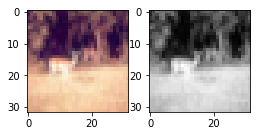

In [15]:
import matplotlib.pyplot as plt
# transform an 3-channel image into one channel
def grayscale(data, dtype='float32'):
  # luma coding weighted average in video systems
  r = np.asarray(.3, dtype=dtype)
  g = np.asarray(.59, dtype=dtype)
  b = np.asarray(.11, dtype=dtype)
  rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
  # add channel dimension
  rst = np.expand_dims(rst, axis=3)
  return rst

X_train_gray = grayscale(X_train)
X_test_gray = grayscale(X_test)

# plot a randomly chosen image
img = round(np.random.rand() * X_train.shape[0])
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(X_train[img], interpolation='none')
plt.subplot(1, 2, 2)
plt.imshow(
    X_train_gray[img, :, :, 0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()

## Feature Selection
When coming to object detection, HOG (histogram of oriented gradients) is often extracted as a feature for classification. It first calculates the gradients of each image patch using sobel filter, then use the magnitudes and orientations of derived gradients to form a histogram per patch (a vector). After normalizing these histograms, it concatenates them into one HOG feature. 

In [0]:
# The code is credit to: "http://www.itdadao.com/articles/c15a1243072p0.html"
def getHOGfeat(image,
               stride=8,
               orientations=8,
               pixels_per_cell=(8, 8),
               cells_per_block=(2, 2)):
  cx, cy = pixels_per_cell
  bx, by = cells_per_block
  sx, sy, sz = image.shape
  n_cellsx = int(np.floor(sx // cx))  # number of cells in x
  n_cellsy = int(np.floor(sy // cy))  # number of cells in y
  n_blocksx = (n_cellsx - bx) + 1
  n_blocksy = (n_cellsy - by) + 1
  gx = np.zeros((sx, sy), dtype=np.double)
  gy = np.zeros((sx, sy), dtype=np.double)
  eps = 1e-5
  grad = np.zeros((sx, sy, 2), dtype=np.double)
  for i in range(1, sx - 1):
    for j in range(1, sy - 1):
      gx[i, j] = image[i, j - 1] - image[i, j + 1]
      gy[i, j] = image[i + 1, j] - image[i - 1, j]
      grad[i, j, 0] = np.arctan(gy[i, j] / (gx[i, j] + eps)) * 180 / math.pi
      if gx[i, j] < 0:
        grad[i, j, 0] += 180
      grad[i, j, 0] = (grad[i, j, 0] + 360) % 360
      grad[i, j, 1] = np.sqrt(gy[i, j]**2 + gx[i, j]**2)
  normalised_blocks = np.zeros((n_blocksy, n_blocksx, by * bx * orientations))
  for y in range(n_blocksy):
    for x in range(n_blocksx):
      block = grad[y * stride:y * stride + 16, x * stride:x * stride + 16]
      hist_block = np.zeros(32, dtype=np.double)
      eps = 1e-5
      for k in range(by):
        for m in range(bx):
          cell = block[k * 8:(k + 1) * 8, m * 8:(m + 1) * 8]
          hist_cell = np.zeros(8, dtype=np.double)
          for i in range(cy):
            for j in range(cx):
              n = int(cell[i, j, 0] / 45)
              hist_cell[n] += cell[i, j, 1]
          hist_block[(k * bx + m) * orientations:(k * bx + m + 1) * orientations] = hist_cell[:]
      normalised_blocks[y, x, :] = hist_block / np.sqrt(
          hist_block.sum()**2 + eps)
  return normalised_blocks.ravel()

In [17]:
X_train_hog = []
X_test_hog = []

print('This will take some minutes.')

for img in X_train_gray:
  img_hog = getHOGfeat(img)
  X_train_hog.append(img_hog)

for img in X_test_gray:
  img_hog = getHOGfeat(img)
  X_test_hog.append(img_hog)

X_train_hog_array = np.asarray(X_train_hog)
X_test_hog_array = np.asarray(X_test_hog)

This will take some minutes.


In [18]:
#K Nearest Neighbors (KNN) on CIFAR-10
# KNN
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

# p=2 and metric='minkowski' means the Euclidean Distance
knn = KNeighborsClassifier(n_neighbors=11, p=2, metric='minkowski')

knn.fit(X_train_hog_array, y_train.ravel())
y_pred = knn.predict(X_test_hog_array)
print('[KNN]')
print('Misclassified samples: %d' % (y_test.ravel() != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

[KNN]
Misclassified samples: 5334
Accuracy: 0.47


In [19]:
#Support Vector Machine (SVM) on CIFAR-10
# SVM
from sklearn.svm import SVC 

# C is the hyperparameter for the error penalty term
# gamma is the hyperparameter for the rbf kernel
svm_linear = SVC(kernel='linear', random_state=0, gamma=0.2, C=10.0)

svm_linear.fit(X_train_hog_array, y_train.ravel())
y_pred = svm_linear.predict(X_test_hog_array)
print('[Linear SVC]')
print('Misclassified samples: %d' % (y_test.ravel() != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test.ravel(), y_pred))

[Linear SVC]
Misclassified samples: 4940
Accuracy: 0.51


# Input Pipeline
## Queues
Because tf.Session objects are designed to be **multithreaded** and thread-safe, so multiple threads can easily use the same session and run ops in parallel. Queues are useful because of the ability to **compute tensor asynchronously** in a graph. Most of the time, we use queues to handle inputs. In this way, multiple threads prepare training example and enequeue these examples. In addition, only parts of inputs would be read into memory a time, instead of all of them. This can **avoid out of memory error when data is large.**
## Typical Input Pipeline
1. The list of filenames
2. Optional filename shuffling
3. Optional epoch limit
4. Filename queue
5. A Reader for the file format
6. A decoder for a record read by the reader
7. Optional preprocessing
8. Example queue

In [0]:
import os
import sys
from six.moves import urllib
import tarfile
import tensorflow as tf
import numpy as np

In [0]:
#Loading Data Manually
# the url to download CIFAR-10 dataset (binary version)
# see format and details here: http://www.cs.toronto.edu/~kriz/cifar.html
DATA_URL = 'http://www.cs.toronto.edu/~kriz/cifar-10-binary.tar.gz'
DEST_DIRECTORY = 'dataset/cifar10'
# the image size we want to keep
IMAGE_HEIGHT = 32
IMAGE_WIDTH = 32
IMAGE_DEPTH = 3
IMAGE_SIZE_CROPPED = 24
BATCH_SIZE = 128
# Global constants describing the CIFAR-10 data set.
NUM_CLASSES = 10 
NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN = 50000
NUM_EXAMPLES_PER_EPOCH_FOR_EVAL = 10000

In [22]:
def maybe_download_and_extract(dest_directory, url):
  """
    Download the dataset and extract the data
  """
    
  if not os.path.exists(dest_directory):
    os.makedirs(dest_directory)
  file_name = 'cifar-10-binary.tar.gz'
  file_path = os.path.join(dest_directory, file_name)
  # if have not downloaded yet
  if not os.path.exists(file_path):
    def _progress(count, block_size, total_size):
      sys.stdout.write('\r%.1f%%' % 
            (float(count * block_size) / float(total_size) * 100.0))
      sys.stdout.flush()  # flush the buffer

    print('>> Downloading %s ...' % file_name)
    file_path, _ = urllib.request.urlretrieve(url, file_path, _progress)
    file_size = os.stat(file_path).st_size
    print('\r>> Total %d bytes' % file_size)
  extracted_dir_path = os.path.join(dest_directory, 'cifar-10-batches-bin')
  if not os.path.exists(extracted_dir_path):
    # Open for reading with gzip compression, then extract all
    tarfile.open(file_path, 'r:gz').extractall(dest_directory)
  print('>> Done')

# download it
maybe_download_and_extract(DEST_DIRECTORY, DATA_URL)

>> Downloading cifar-10-binary.tar.gz ...
>> Total 170052171 bytes
>> Done


After downloading the dataset, we create functions

* distort_input(training_file, batch_size) to get a training example queue.
* eval_input(testing_file, batch_size) to get a testing example queue.
* read_cifar10(filename_queue) to read a record from dataset with a filename queue.

In [0]:
# the folder store the dataset
DATA_DIRECTORY = DEST_DIRECTORY + '/cifar-10-batches-bin'
# (1) a list of training/testing filenames
training_files = [os.path.join(DATA_DIRECTORY, 'data_batch_%d.bin' % i) for i in range(1,6)]
testing_files = [os.path.join(DATA_DIRECTORY, 'test_batch.bin')]

In [0]:
# (5) + (6)
def read_cifar10(filename_queue):
  """ Reads and parses examples from CIFAR10 data files.
    -----
    Args:
        filename_queue: 
            A queue of strings with the filenames to read from.
    Returns:
        An object representing a single example, with the following fields:
        height: 
            number of rows in the result (32)
        width: 
            number of columns in the result (32)
        depth: 
            number of color channels in the result (3)
        key: 
            a scalar string Tensor describing the filename & record number for this example.
        label: 
            an int32 Tensor with the label in the range 0..9.
        image: 
            a [height, width, depth] uint8 Tensor with the image data
  """

  class CIFAR10Record(object):
    pass

  result = CIFAR10Record()
  # CIFAR10 consists of 60000 32x32 'color' images in 10 classes
  label_bytes = 1  # 10 class
  result.height = IMAGE_HEIGHT
  result.width = IMAGE_WIDTH
  result.depth = IMAGE_DEPTH
  image_bytes = result.height * result.width * result.depth
  # bytes of a record: label(1 byte) followed by pixels(3072 bytes)
  record_bytes = label_bytes + image_bytes
  # (5) reader for cifar10 file format
  reader = tf.FixedLengthRecordReader(record_bytes=record_bytes)
  # read a record
  result.key, record_string = reader.read(filename_queue)
  # Convert from a string to a vector of uint8 that is record_bytes long.
  # (6) decoder
  record_uint8 = tf.decode_raw(record_string, tf.uint8)
  # get the label and cast it to int32
  result.label = tf.cast(
      tf.strided_slice(record_uint8, [0], [label_bytes]), tf.int32)
  # [depth, height, width], uint8
  depth_major = tf.reshape(
      tf.strided_slice(record_uint8, [label_bytes],
                       [label_bytes + image_bytes]),
      [result.depth, result.height, result.width])
  # change to [height, width, depth], uint8
  result.image = tf.transpose(depth_major, [1, 2, 0])
  return result


In [0]:
def distort_input(training_files, batch_size):
  """ Construct distorted input for CIFAR training using the Reader ops.
    -----
    Args:
        training_files: 
            an array of paths of the training files.
        batch_size: 
            Number of images per batch.
    Returns:
        images: Images. 
            4D tensor of [batch_size, IMAGE_SIZE, IMAGE_SIZE, 3] size.
        labels: Labels. 
            1D tensor of [batch_size] size.
  """
  for f in training_files:
    if not tf.gfile.Exists(f):
      raise ValueError('Failed to find file: ' + f)
  # create a queue that produces filenames to read
  # (4) filename queue
  file_queue = tf.train.string_input_producer(training_files)
  # (5) + (6)
  cifar10_record = read_cifar10(file_queue)
  # (7) image preprocessing for training
  height = IMAGE_SIZE_CROPPED
  width = IMAGE_SIZE_CROPPED
  float_image = tf.cast(cifar10_record.image, tf.float32)
  distorted_image = tf.random_crop(float_image, [height, width, 3])
  distorted_image = tf.image.random_flip_left_right(distorted_image)
  distorted_image = tf.image.random_brightness(distorted_image, max_delta=63)
  distorted_image = tf.image.random_contrast(
      distorted_image, lower=0.2, upper=1.8)
  # standardization: subtract off the mean and divide by the variance of the pixels
  distorted_image = tf.image.per_image_standardization(distorted_image)
  # Set the shapes of tensors.
  distorted_image.set_shape([height, width, 3])
  cifar10_record.label.set_shape([1])
  # ensure a level of mixing of elements.
  min_fraction_of_examples_in_queue = 0.4
  min_queue_examples = int(
      NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN * min_fraction_of_examples_in_queue)
  # (8) example queue
  # Filling queue with min_queue_examples CIFAR images before starting to train
  image_batch, label_batch = tf.train.shuffle_batch(
      [distorted_image, cifar10_record.label],
      batch_size=batch_size,
      num_threads=16,
      capacity=min_queue_examples + 3 * batch_size,
      min_after_dequeue=min_queue_examples)
  return image_batch, tf.reshape(label_batch, [batch_size])


In [0]:
def eval_input(testing_files, batch_size):
  for f in testing_files:
    if not tf.gfile.Exists(f):
      raise ValueError('Failed to find file: ' + f)
  # create a queue that produces filenames to read
  file_queue = tf.train.string_input_producer(testing_files)
  cifar10_record = read_cifar10(file_queue)
  # image preprocessing for training
  height = IMAGE_SIZE_CROPPED
  width = IMAGE_SIZE_CROPPED
  float_image = tf.cast(cifar10_record.image, tf.float32)
  resized_image = tf.image.resize_image_with_crop_or_pad(
      float_image, height, width)
  image_eval = tf.image.per_image_standardization(resized_image)
  image_eval.set_shape([height, width, 3])
  cifar10_record.label.set_shape([1])
  # Ensure that the random shuffling has good mixing properties.
  min_fraction_of_examples_in_queue = 0.4
  min_queue_examples = int(
      NUM_EXAMPLES_PER_EPOCH_FOR_EVAL * min_fraction_of_examples_in_queue)
  image_batch, label_batch = tf.train.batch(
      [image_eval, cifar10_record.label],
      batch_size=batch_size,
      num_threads=16,
      capacity=min_queue_examples + 3 * batch_size)
  return image_batch, tf.reshape(label_batch, [batch_size])

In [27]:
# test function distort_input
with tf.Session() as sess:
  coord = tf.train.Coordinator()
  image, label = distort_input(training_files, BATCH_SIZE)
  # --- Note ---
  # If you forget to call start_queue_runners(), it will hang
  # indefinitely and deadlock the user program.
  # ------------
  threads = tf.train.start_queue_runners(sess=sess, coord=coord)
  image_batch, label_batch = sess.run([image, label])
  coord.request_stop()
  coord.join(threads)
  image_batch_np = np.asarray(image_batch)
  label_batch_np = np.asarray(label_batch)
  print('Shape of cropped image:', image.shape)
  print('Shape of label:', label.shape)

W0729 12:50:51.301943 140266438244224 deprecation.py:323] From <ipython-input-25-ffb8660fa920>:20: string_input_producer (from tensorflow.python.training.input) is deprecated and will be removed in a future version.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
W0729 12:50:51.321058 140266438244224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/input.py:278: input_producer (from tensorflow.python.training.input) is deprecated and will be removed in a future version.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
W072

Shape of cropped image: (128, 24, 24, 3)
Shape of label: (128,)


## Tensorflow Dataset API
to build a data input pipeline with tf.data.Dataset, here are the steps for you can follow:

1. Define data source and initialize your Dataset object
2. Apply transformations on the dataset, following are some common useful techniques
* map
* batch
* shuffle
* repeat
3. Create iterator


In [0]:
#Construct your Dataset
# an array with shape (8, 5)
raw_data_a = np.array([[1, 1.1, 1.2, 1.3, 1.4], 
                     [2, 2.1, 2.2, 2.3, 2.4], 
                     [3, 3.1, 3.2, 3.3, 3.4],
                     [4, 4.1, 4.2, 4.3, 4.4],
                     [5, 5.1, 5.2, 5.3, 5.4],
                     [6, 6.1, 6.2, 6.3, 6.4],
                     [7, 7.1, 7.2, 7.3, 7.4],
                     [8, 8.1, 8.2, 8.3, 8.4]
                    ])
# a list with len 8
raw_data_b = ["1", "2", "3", "4", "5", "6", "7", "8"]

In [29]:
# thie tells the dataset that each row of raw_data_a is corresponding to each element of raw_data_b
dataset = tf.data.Dataset.from_tensor_slices((raw_data_a, raw_data_b))
print(dataset)

<DatasetV1Adapter shapes: ((5,), ()), types: (tf.float64, tf.string)>


In [30]:
#Apply transformations
#map
#For example, Dataset.map() provide element-wise customized data preprocessing.
def preprocess_function(one_row_a, one_b):
    """
        Input: one slice of the dataset
        Output: modified slice
    """
    # do some data preprocessing
    # you can also input filenames and load data in here
    
    return tf.reshape(one_row_a, [1, 5]), tf.string_to_number(one_b)

dataset = dataset.map(preprocess_function)
print(dataset)

<DatasetV1Adapter shapes: ((1, 5), ()), types: (tf.float64, tf.float32)>


In [0]:
#shuffle
#Dataset.shuffle maintains a fixed-size buffer and chooses the next element uniformly at random from that buffer. This way, 
#you can see your data coming with different order in different epoch. 
#This can prevent your model overfit on the order of your training data.
dataset = dataset.shuffle(16)
#batch
#Now our dataset is one example by one example. 
#However, in reality, we usually want to read one batch at a time, 
#thus we can call Dataset.batch(batch_size) to stack batch_size elements together.
#Note: Be careful that if you apply Dataset.shuffle after Dataset.batch, you'll get shuffled batch but data in a batch remains the same.
dataset = dataset.batch(2)
#repeat
#Dataset.repeat(epoch) allow you iterate over a dataset in multiple epochs. 
#epoch = None will let the dataset repeats indefinitely.
dataset = dataset.repeat()

## Create Iterator and Read data
The tf.data API currently supports the following iterators, in increasing level of sophistication:

* one-shot : One-shot iterators handle almost all of the cases that the existing queue-based input pipelines support, but they do not support parameterization.
* initializable: requires you to run an explicit iterator.initializer operation before using it. In exchange for this inconvenience, it enables you to parameterize the definition of the dataset, using one or more tf.placeholder() tensors that can be fed when you initialize the iterator.
* reinitializable: can be initialized from multiple different Dataset objects. For example, if you have training data and testing data with same format.
* feedable: can be used together with tf.placeholder to select what Iterator to use in each call to tf.Session.run.

In [0]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config = config)

In [33]:
iterator_oneshot = dataset.make_one_shot_iterator()
next_element_oneshot = iterator_oneshot.get_next()

for i in range(8):
    a, b = sess.run(next_element_oneshot)
    print("Batch ", i, ", b are ", b)

W0729 12:51:05.260281 140266438244224 deprecation.py:323] From <ipython-input-33-435ac3b96f78>:1: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


Batch  0 , b are  [1. 2.]
Batch  1 , b are  [4. 5.]
Batch  2 , b are  [8. 6.]
Batch  3 , b are  [7. 3.]
Batch  4 , b are  [7. 3.]
Batch  5 , b are  [5. 8.]
Batch  6 , b are  [6. 4.]
Batch  7 , b are  [2. 1.]


In [34]:
iterator_initializable = dataset.make_initializable_iterator()
next_element_initializable = iterator_initializable.get_next()

W0729 12:51:06.928398 140266438244224 deprecation.py:323] From <ipython-input-34-df1bbeb2c603>:1: DatasetV1.make_initializable_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


In [0]:
# before getting the next element, should run the initializer
sess.run(iterator_initializable.initializer)

In [36]:
for i in range(8):
    a, b = sess.run(next_element_initializable)
    print("Batch ", i, ", b are ", b)

Batch  0 , b are  [8. 5.]
Batch  1 , b are  [6. 2.]
Batch  2 , b are  [1. 3.]
Batch  3 , b are  [4. 7.]
Batch  4 , b are  [1. 8.]
Batch  5 , b are  [4. 6.]
Batch  6 , b are  [5. 2.]
Batch  7 , b are  [3. 7.]


# CNN Model for CIFAR 10

In [0]:
class CNN_Model(object):
  def __init__(self, model_hps):
    self.image_size = model_hps.image_size
    self.batch_size = model_hps.batch_size
    self.num_classes = model_hps.num_classes
    self.num_training_example = model_hps.num_training_example
    self.num_epoch_per_decay = model_hps.num_epoch_per_decay
    self.init_lr = model_hps.init_lr  # initial learn rate
    self.moving_average_decay = model_hps.moving_average_decay
    self.ckpt_dir = model_hps.ckpt_dir
    
    self.build_model()
    
  def build_model(self):
    # op for training
    self.global_step = tf.contrib.framework.get_or_create_global_step()
        
    with tf.variable_scope('model'):
      self.images = tf.placeholder(tf.float32,[self.batch_size, self.image_size, self.image_size, 3]) 
      self.labels = tf.placeholder(tf.int32)
        
      self.logits = self.inference(self.images)
      self.top_k_op = tf.nn.in_top_k(self.logits, self.labels, 1) 
      self.total_loss = self.loss(self.logits, self.labels)
      self.train_op = self.train(self.total_loss, self.global_step)
    
  def _variable_on_cpu(self, name, shape, initializer):
    with tf.device('/cpu:0'):
      var = tf.get_variable(name, shape, initializer=initializer, dtype=tf.float32)
    
    return var

  def _variable_with_weight_decay(self, name, shape, stddev, wd=0.0):
    """ Helper to create an initialized Variable with weight decay.
        Note that the Variable is initialized with a truncated normal 
        distribution. A weight decay is added only if one is specified.
        -----
        Args:
            name: 
                name of the variable
            shape: 
                a list of ints
            stddev: 
                standard deviation of a truncated Gaussian
            wd: 
                add L2Loss weight decay multiplied by this float. If None, weight
                decay is not added for this Variable.
        Returns:
            Variable Tensor
    """
    initializer = tf.truncated_normal_initializer(
        stddev=stddev, dtype=tf.float32)
    var = self._variable_on_cpu(name, shape, initializer)
    # deal with weight decay
    weight_decay = tf.multiply(tf.nn.l2_loss(var), wd, name='weight_loss')
    tf.add_to_collection('losses', weight_decay)
    return var

  def _conv_block(self, inp, scope, kernel_width, kernel_height, inp_channel, out_channel, strides = [1, 1, 1, 1], padding='SAME'):
    with tf.variable_scope(scope) as scope:
      kernel = self._variable_with_weight_decay('weights', [kernel_width, kernel_width, inp_channel, out_channel], 5e-2)
      biases = self._variable_on_cpu('bias', [out_channel], tf.constant_initializer(0.0))

      conv = tf.nn.conv2d(inp, kernel, strides=strides, padding=padding)
      pre_activation = tf.nn.bias_add(conv, biases)
      return tf.nn.relu(pre_activation, name=scope.name)

  def _fully_connected_layer(self, inp, scope, in_dim, out_dim, relu = True):
    with tf.variable_scope(scope) as scope:
      weights = self._variable_with_weight_decay('weights', [in_dim, out_dim], 0.04, 0.004)
      biases = self._variable_on_cpu('biases', [out_dim], tf.constant_initializer(0.1))
      if relu:
        return tf.nn.relu(tf.matmul(inp, weights) + biases, name=scope.name)
      else:
        return tf.matmul(inp, weights) + biases
    
  def inference(self, images):
    """ build the model
        -----
        Args:
            images with shape [batch_size,24,24,3]
        Return:
            logits with shape [batch_size,10]
    """
    conv_1 = self._conv_block(images, 'conv_1', 5, 5, 3, 64)
    # pool_1
    pool_1 = tf.nn.max_pool(conv_1,ksize=[1, 3, 3, 1],strides=[1, 2, 2, 1],padding='SAME',name='pool_1')
    # norm_1 (local_response_normalization)
    norm_1 = tf.nn.lrn(pool_1, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm_1')
    
    # conv2
    conv_2 = self._conv_block(norm_1, 'conv_2', 5, 5, 64, 64)
    # norm2
    norm_2 = tf.nn.lrn(conv_2, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm_2')
    # pool2
    pool_2 = tf.nn.max_pool(norm_2,ksize=[1, 3, 3, 1],strides=[1, 2, 2, 1],padding='SAME',name='pool_2')
    
    # Flatten feature maps before fully connected layers
    flat_features = tf.reshape(pool_2, [self.batch_size, -1])
    dim = flat_features.get_shape()[1].value
    # FC_1 (fully-connected layer)
    fc_1 = self._fully_connected_layer(flat_features, 'fc1', dim, 384)

    # FC_2
    fc_2 = self._fully_connected_layer(fc_1, 'fc2', 384, 192)

    logits = self._fully_connected_layer(fc_2, 'softmax_linear', 192, self.num_classes, relu = False)
    return logits

  def loss(self, logits, labels):
    '''calculate the loss'''
    labels = tf.cast(labels, tf.int64)
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=labels, logits=logits, name='cross_entropy_per_example')
    cross_entropy_mean = tf.reduce_mean(cross_entropy, name='cross_entropy')
    tf.add_to_collection('losses', cross_entropy_mean)
    # The total loss is defined as the cross entropy loss plus all of the weight
    # decay terms (L2 loss).
    return tf.add_n(tf.get_collection('losses'), name='total_loss')

  def train(self, total_loss, global_step):
    '''Return training operation of one step'''
    num_batches_per_epoch = self.num_training_example / self.batch_size
    decay_steps = int(num_batches_per_epoch * self.num_epoch_per_decay)
    # Decay the learning rate exponentially based on the number of steps.
    lr = tf.train.exponential_decay(
        self.init_lr, global_step, decay_steps, decay_rate=0.1, staircase=True)
    opt = tf.train.GradientDescentOptimizer(lr)
    grads = opt.compute_gradients(total_loss)
    apply_gradient_op = opt.apply_gradients(grads, global_step=global_step)
    # Track the moving averages of all trainable variables.
    # This step just records the moving average weights but not uses them
    ema = tf.train.ExponentialMovingAverage(self.moving_average_decay,
                                            global_step)
    self.ema = ema
    variables_averages_op = ema.apply(tf.trainable_variables())
    with tf.control_dependencies([apply_gradient_op, variables_averages_op]):
      train_op = tf.no_op(name='train')
    return train_op

In [0]:

model_hps_cifar = tf.contrib.training.HParams(
  image_size = IMAGE_SIZE_CROPPED,
  batch_size = BATCH_SIZE,
  num_classes = NUM_CLASSES,
  num_training_example = NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN,
  num_epoch_per_decay = 350.0,
  init_lr = 0.1,
  moving_average_decay = 0.9999,
  ckpt_dir = './model/'
)

In [39]:
tf.reset_default_graph()
# CNN model
model = CNN_Model(model_hps_cifar)
# Here we use CPU to handle the input because we want GPU to only focus on training.
with tf.device('/cpu:0'):
  data_train = distort_input(training_files, BATCH_SIZE)

W0729 12:51:16.608037 140266438244224 deprecation.py:323] From <ipython-input-37-bb039c695d90>:16: get_or_create_global_step (from tensorflow.contrib.framework.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
W0729 12:51:16.622698 140266438244224 deprecation.py:506] From <ipython-input-37-bb039c695d90>:52: calling TruncatedNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0729 12:51:16.844196 140266438244224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/moving_averages.py:433: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Vari

In [0]:
def run_training(model, data_train , num_epoch):
  saver = tf.train.Saver()
  with tf.Session() as sess:
    ckpt = tf.train.get_checkpoint_state(model.ckpt_dir)
    if (ckpt and ckpt.model_checkpoint_path):
      saver.restore(sess, ckpt.model_checkpoint_path)
      # assume the name of checkpoint is like '.../model.ckpt-1000'
      gs = int(ckpt.model_checkpoint_path.split('/')[-1].split('-')[-1])
      sess.run(tf.assign(model.global_step, gs))
    else:
      # no checkpoint found
      sess.run(tf.global_variables_initializer())
        
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    model.loss_each_epoch = []
    
    num_batch_per_epoch = NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN//model.batch_size
    #start training
    for i in range(num_epoch):
      _loss = []
      for _ in range(num_batch_per_epoch):
        images, labels = sess.run(data_train)
        
        l, _ = sess.run([model.total_loss, model.train_op], feed_dict = {model.images:images, model.labels:labels})
        _loss.append(l)
      loss_this_epoch = np.sum(_loss)
      gs = model.global_step.eval()
      # print('loss of epoch %d: %f' % (gs / num_batch_per_epoch, loss_this_epoch))
      model.loss_each_epoch.append(loss_this_epoch)
      saver.save(sess, model.ckpt_dir + 'model.ckpt', global_step=gs)
    coord.request_stop()
    coord.join(threads)
  print('Done training %d epochs' %num_epoch)

In [0]:
run_training(model, data_train, 180)

W0729 13:12:44.896154 140266438244224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


In [0]:
#Because now the weights are not moving average weights, we need to manually change this.
def run_testing(model, data_test):
  variables_to_restore = model.ema.variables_to_restore()
  saver = tf.train.Saver(variables_to_restore)
    
  with tf.Session() as sess:
    # Restore variables from disk.
    ckpt = tf.train.get_checkpoint_state(model.ckpt_dir)
        
    if ckpt and ckpt.model_checkpoint_path:
      saver.restore(sess, ckpt.model_checkpoint_path)
      coord = tf.train.Coordinator()
      threads = tf.train.start_queue_runners(sess=sess, coord=coord)
        
      num_iter = NUM_EXAMPLES_PER_EPOCH_FOR_EVAL // model.batch_size
      total_sample_count = num_iter * model.batch_size
      true_count = 0
      for _ in range(num_iter):
        images, labels = sess.run(data_test) 
        
        predictions = sess.run(model.top_k_op, feed_dict = {model.images:images, model.labels:labels})
        true_count += np.sum(predictions)
      print('Accurarcy: %d/%d = %f' % (true_count, total_sample_count,
                                         true_count / total_sample_count))
      coord.request_stop()
      coord.join(threads)
    else:
      print('train first')

In [0]:
data_test = distort_input(testing_files, BATCH_SIZE)

In [0]:
run_testing(model, data_test)